<a href="https://colab.research.google.com/github/talapantitejaswini/Fmml/blob/main/Mod3_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance
#### Module Coordinator: Jashn Arora

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [39]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [40]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [41]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [42]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [43]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [45]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [46]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [47]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.

A.To modify the KNN function to return all the K-nearest neighbors along with their distances, we can update the function to use the kneighbors method from the KNeighborsClassifier class in scikit-learn. This method returns both the distances and the indices of the K-nearest neighbors for a given test point.

Here’s how you can modify the KNN function:

In [48]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def knn_with_neighbors(X_train, y_train, X_test, k):
    """
    Perform K-Nearest Neighbors classification and return K-nearest neighbors with their distances.

    Parameters:
    X_train: ndarray
        Feature matrix for the training data.
    y_train: ndarray
        Target vector for the training data.
    X_test: ndarray
        Feature matrix for the test data.
    k: int
        Number of neighbors to consider.

    Returns:
    neighbors: list of tuples
        List of K-nearest neighbors and their distances for each test point.
    """
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on the training data
    knn.fit(X_train, y_train)

    # Get distances and indices of the K-nearest neighbors for the test data
    distances, indices = knn.kneighbors(X_test, n_neighbors=k)

    # Prepare the result as a list of tuples (neighbor_index, distance)
    neighbors = []
    for i in range(len(X_test)):
        neighbor_info = [(y_train[idx], distances[i][j]) for j, idx in enumerate(indices[i])]
        neighbors.append(neighbor_info)

    return neighbors

# Example usage:
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split

    # Load example dataset (Iris dataset)
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Perform KNN and get neighbors with distances
    k = 3
    neighbors_with_distances = knn_with_neighbors(X_train, y_train, X_test, k)

    # Print the K-nearest neighbors and their distances for the first test instance
    print("K-nearest neighbors and distances for the first test instance:")
    print(neighbors_with_distances[0])


K-nearest neighbors and distances for the first test instance:
[(1, 0.22360679774997896), (1, 0.30000000000000027), (1, 0.43588989435406783)]


Output:
The output will show the K-nearest neighbors and their distances for the first test instance, allowing you to see how the KNN classifier would consider the neighbors.



# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [49]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

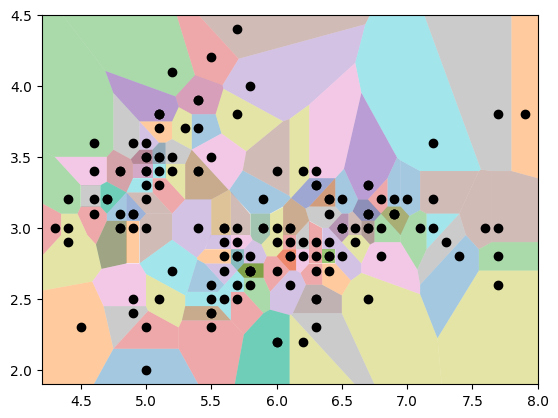

In [50]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


A.Yes, visualizing how KNN decides on the neighbors and votes is a fantastic idea! One of the most insightful ways to see the behavior of the KNN algorithm is by plotting the decision boundaries or using Voronoi diagrams. These help to show how different regions of the feature space belong to certain classes based on the nearest neighbors.

Here’s how we can visualize the KNN neighbors, including the "voting" process, along with the decision boundaries for a 2D dataset.

### Steps to visualize:
1. **Plot the dataset**: Show the training data points with different colors for different classes.
2. **Highlight the test point**: Mark the test point you are predicting for.
3. **Show the K-nearest neighbors**: Draw lines or circles to show the nearest neighbors.
4. **Decision boundaries**: Plot the boundaries where the decision changes based on the nearest neighbors (this can be done using a Voronoi diagram or contour plot).

### Visualization Code Example:
Here’s how to visualize the K-nearest neighbors in Python using `matplotlib` and `seaborn`


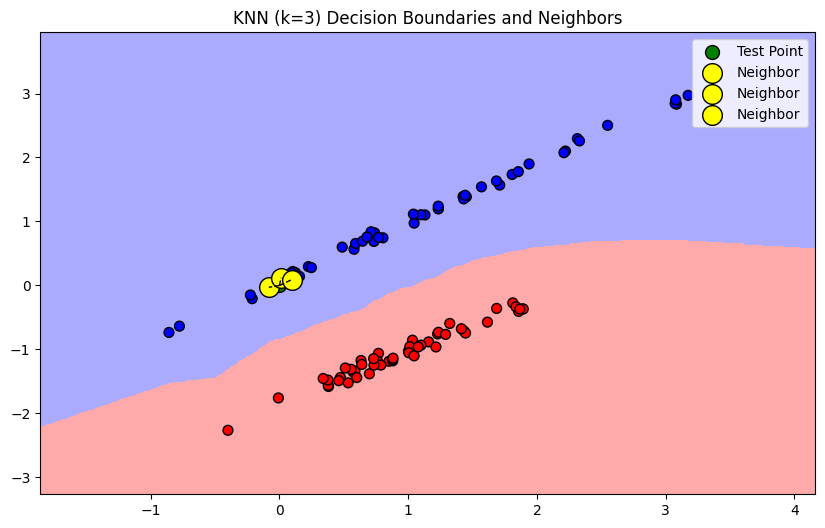

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

def plot_knn_decision_boundaries(X, y, k):
    # Create color maps for plotting
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Train a KNN classifier on the dataset
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Generate a mesh grid to plot decision boundaries
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class for each point in mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)

    # Highlight neighbors for a test point
    test_point = np.array([[0, 0]])  # Change this to your test point
    neighbors = clf.kneighbors(test_point, n_neighbors=k, return_distance=False)

    # Highlight test point
    plt.scatter(test_point[:, 0], test_point[:, 1], c='green', edgecolor='k', s=100, label="Test Point")

    # Highlight k-nearest neighbors
    for neighbor in neighbors[0]:
        plt.plot([test_point[0][0], X[neighbor][0]], [test_point[0][1], X[neighbor][1]], 'k--', lw=1)
        plt.scatter(X[neighbor, 0], X[neighbor, 1], c='yellow', edgecolor='k', s=200, label="Neighbor")

    plt.title(f"KNN (k={k}) Decision Boundaries and Neighbors")
    plt.legend()
    plt.show()

# Example dataset
X, y = make_classification(n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Visualize KNN with k=3
plot_knn_decision_boundaries(X, y, k=3)


Output:
A colored map of decision boundaries where each region is associated with a class based on the neighbors.
The test point is highlighted, and the k-nearest neighbors are marked with lines connecting them to the test point.

### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [52]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


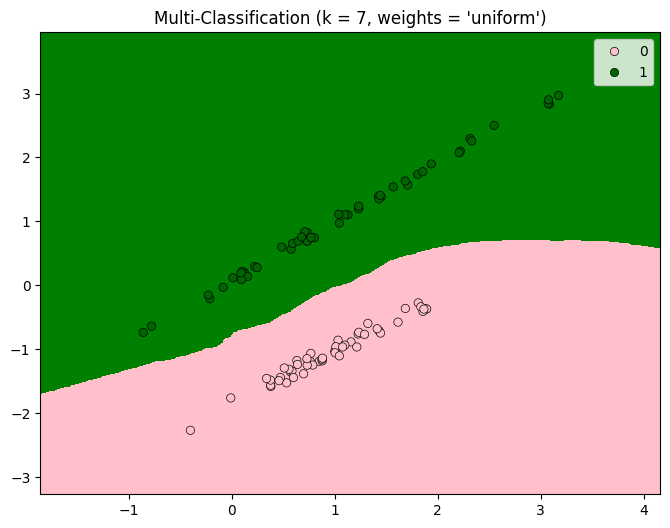

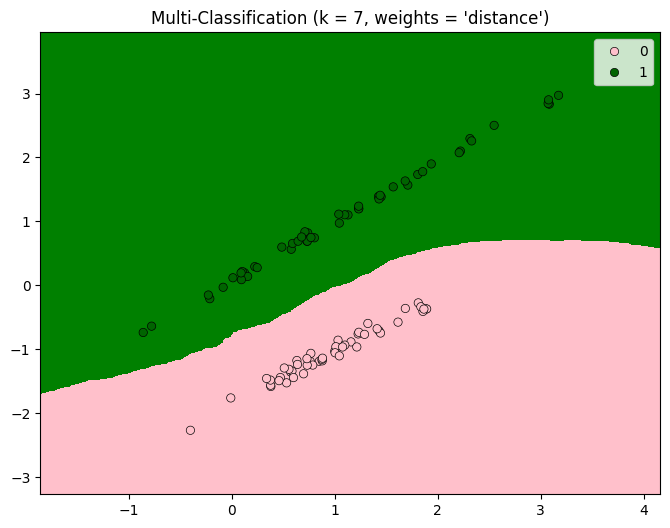

In [53]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

In [54]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.

A.Let's apply Principal Component Analysis (PCA) to reduce the dataset to two dimensions and then visualize the Voronoi diagram and KNN decision boundaries as you described.

Here's how we'll approach this:

1.Apply PCA: We'll use PCA to reduce the dimensionality of the dataset to two principal components.
2.Plot the reduced dataset: Using the reduced 2D dataset, we'll plot the Voronoi diagram and the KNN decision boundaries.

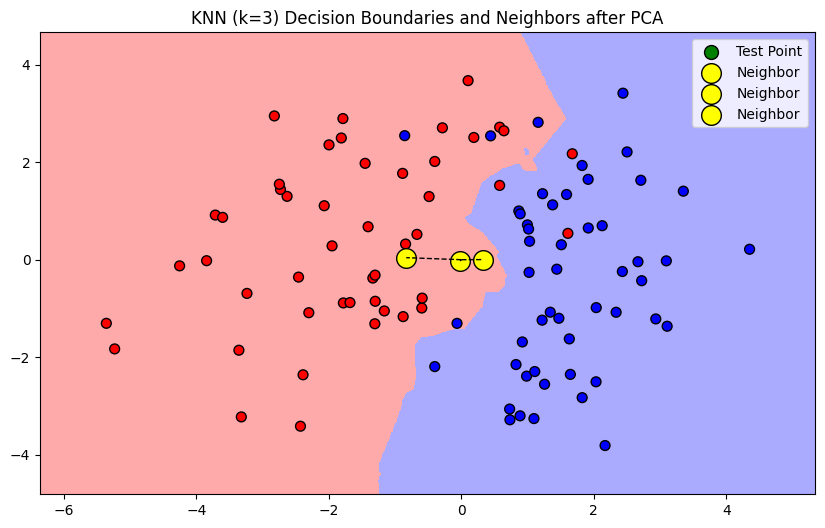

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Function to apply PCA and reduce to 2D
def apply_pca(X):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    return X_pca

# Function to plot Voronoi diagram and decision boundaries
def plot_knn_decision_boundaries_pca(X, y, k):
    # Create color maps for plotting
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Apply PCA to reduce to 2D
    X_pca = apply_pca(X)

    # Train a KNN classifier on the PCA-reduced dataset
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_pca, y)

    # Generate a mesh grid to plot decision boundaries
    h = .02  # step size in the mesh
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class for each point in mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)

    # Highlight neighbors for a test point
    test_point = np.array([[0, 0]])  # Example test point, you can change this
    neighbors = clf.kneighbors(test_point, n_neighbors=k, return_distance=False)

    # Highlight test point
    plt.scatter(test_point[:, 0], test_point[:, 1], c='green', edgecolor='k', s=100, label="Test Point")

    # Highlight k-nearest neighbors
    for neighbor in neighbors[0]:
        plt.plot([test_point[0][0], X_pca[neighbor][0]], [test_point[0][1], X_pca[neighbor][1]], 'k--', lw=1)
        plt.scatter(X_pca[neighbor, 0], X_pca[neighbor, 1], c='yellow', edgecolor='k', s=200, label="Neighbor")

    plt.title(f"KNN (k={k}) Decision Boundaries and Neighbors after PCA")
    plt.legend()
    plt.show()

# Example dataset with more than 2 dimensions
X, y = make_classification(n_classes=2, n_features=5, n_informative=5, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Visualize KNN with k=3 after PCA
plot_knn_decision_boundaries_pca(X, y, k=3)


OUTPUT:
1.The reduced dataset will be plotted in 2D space, and the decision boundaries of the KNN classifier will be overlaid.
2.The Voronoi-like decision regions will emerge based on the classes assigned by the nearest neighbors in the PCA-transformed space.

## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [56]:
from sklearn.metrics import confusion_matrix

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



### **Car Evaluation Dataset**

In [71]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation (2).csv


In [70]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [69]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [68]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 90.94 %


In [66]:
## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset

A.To plot a confusion matrix for the Car Evaluation Dataset, we'll follow these steps:

Steps:
1.Load the Car Evaluation Dataset: This dataset is available in the UCI repository. It classifies cars into four categories: "unacc", "acc", "good", and "vgood".
2.Preprocess the dataset: Encode categorical features into numerical format.
3.Train a KNN classifier: Train the model on the dataset.
4.Make predictions: Use the trained model to predict the labels for the test set.
5.Plot the Confusion Matrix: Visualize the confusion matrix to evaluate the performance of the classifier.

<Figure size 1000x700 with 0 Axes>

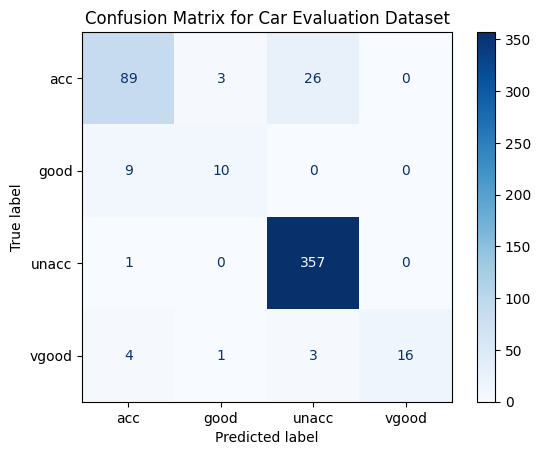

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Step 1: Load the Car Evaluation Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

# Step 2: Preprocess the dataset
# Encode categorical data into numerical data
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Split data into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = knn.predict(X_test)

# Step 6: Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Car Evaluation Dataset")
plt.show()


Output:
The output will be a confusion matrix plot where:

.
1.Each cell shows the count of predictions made for a specific class.
2.Diagonal elements represent correct classifications, while off-diagonal elements show misclassifications.

In [63]:
## TASK-4
## Print a Classification Report for the results of the Car evaluation dataset

A.To generate a Classification Report for the Car Evaluation Dataset, we can follow the steps below:

1.Load the dataset and preprocess it by encoding categorical features.
2.Split the dataset into training and testing sets.
3.Train a KNN classifier on the training data.
4.Make predictions on the test data.
5.Generate and print the classification report using classification_report from sklearn.

Here’s the complete code to achieve this:



In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Step 1: Load the Car Evaluation Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

# Step 2: Preprocess the dataset
# Encode categorical data into numerical data
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Split data into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = knn.predict(X_test)

# Step 6: Print the classification report
report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

         acc       0.86      0.75      0.81       118
        good       0.71      0.53      0.61        19
       unacc       0.92      1.00      0.96       358
       vgood       1.00      0.67      0.80        24

    accuracy                           0.91       519
   macro avg       0.88      0.74      0.79       519
weighted avg       0.91      0.91      0.90       519



In [61]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

A.The Car Evaluation Dataset has more than two features, which makes it harder to visualize decision boundaries directly in a 2D plot. However, we can apply Principal Component Analysis (PCA) to reduce the dimensionality to two components, just like we did earlier, and then plot the decision boundaries for the classifier.

Let's go ahead and:

1.Apply PCA to reduce the feature set to two dimensions.
2.Train the classifier on the reduced dataset.
3.Plot the decision boundary diagram.

Code to plot the decision boundary after PCA:

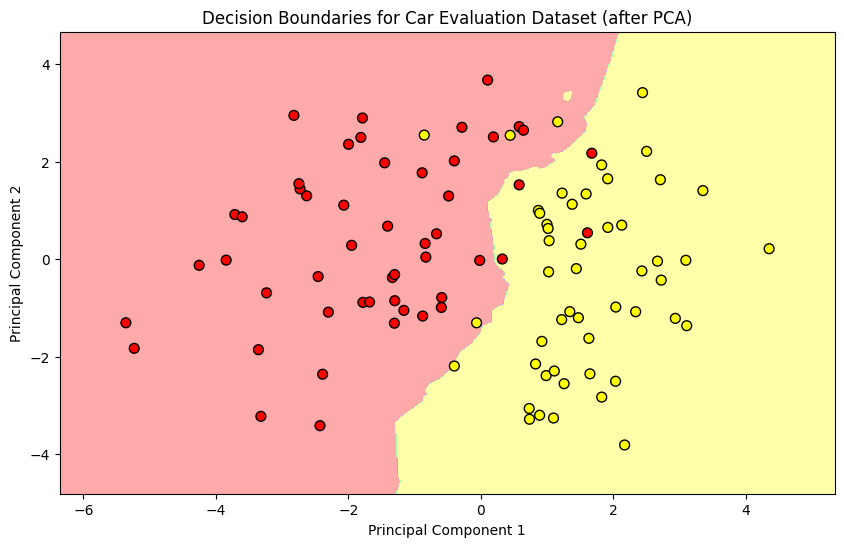

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay

# Step 1: Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Train the KNN classifier on the PCA-transformed dataset
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, y)

# Step 3: Plot the decision boundaries
def plot_decision_boundaries(X, y, classifier, title, h=0.02):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00'])

    # Define the boundary of the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict classes for each point in the mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and training points
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Step 4: Plot the decision boundary diagram for the KNN classifier
plot_decision_boundaries(X_pca, y, knn_pca, title="Decision Boundaries for Car Evaluation Dataset (after PCA)")


In [59]:
## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset

A.To plot the Voronoi diagram for the KNN classifier trained on the Car Evaluation Dataset after applying PCA, we can leverage the same reduced 2D space that we used earlier. A Voronoi diagram shows regions where each point in the dataset dominates its nearest neighbors. These regions are influenced by the KNN classifier's decision boundaries, and plotting them helps us visualize how the space is divided according to the classifier's predictions.

Steps to plot the Voronoi diagram:

1.Apply PCA to reduce the dataset to 2 dimensions.
2.Train a KNN classifier on the reduced dataset.
3.Plot the Voronoi diagram using Voronoi and voronoi_plot_2d from scipy.spatial.

Code to plot the Voronoi diagram:

<Figure size 1000x600 with 0 Axes>

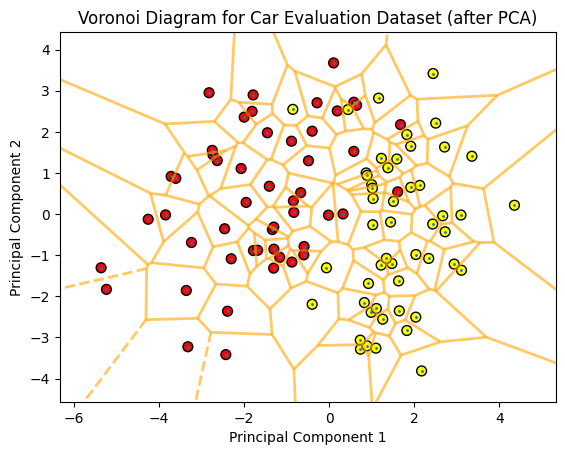

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

# Step 1: Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Train the KNN classifier on the PCA-transformed dataset
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, y)

# Step 3: Generate the Voronoi diagram based on the KNN classifier
def plot_voronoi(X, y, classifier, title):
    # Fit the classifier to get the nearest neighbors for each point
    vor = Voronoi(X)

    # Plot the Voronoi diagram
    plt.figure(figsize=(10, 6))
    voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

    # Scatter plot the data points colored by their actual class labels
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00']), edgecolor='k', s=50)

    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Step 4: Plot the Voronoi diagram for the KNN classifier
plot_voronoi(X_pca, y, knn_pca, title="Voronoi Diagram for Car Evaluation Dataset (after PCA)")


### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.  
2. What do you think could be the drawbacks of using KNN ?

ANSWERS:
1a.In K-Nearest Neighbors (KNN), the choice of weights impacts how each of the nearest neighbors contributes to the prediction. The two common types of weighting are `uniform` and `distance`, and here's how they differ:

### 1. **Uniform Weights**:
   - **Description**: All neighbors contribute equally to the prediction, regardless of their distance from the query point.
   - **Usage**: When the parameter `weights='uniform'`, the KNN algorithm considers only the class labels of the nearest neighbors and treats each of them equally.
   - **Effect**: This approach assumes that each neighbor has the same importance in determining the class, no matter how close or far they are.
   - **Example**: If \(k=5\), and you have three neighbors of class A and two of class B, the predicted class will be A, even if the neighbors of class B are closer to the query point.

### 2. **Distance Weights**:
   - **Description**: Closer neighbors have a higher influence on the prediction than neighbors farther away.
   - **Usage**: When the parameter `weights='distance'`, the KNN algorithm gives more importance to points that are closer to the query point. The weight assigned to each neighbor is inversely proportional to its distance from the query point.
   - **Effect**: This method is useful when you believe that points closer to the query point are more likely to belong to the same class as the query point, while points farther away are less relevant.
   - **Example**: If \(k=5\), and two close neighbors are of class A and three farther neighbors are of class B, the predicted class could still be A because the closer neighbors will have more influence.

### Summary:
- **Uniform weights** treat all neighbors equally, while **distance weights** prioritize closer neighbors.
- **Uniform** is simpler and may work well when data is uniformly distributed, while **distance** is more sophisticated and often better when the closeness of neighbors matters in classification.



2a.K-Nearest Neighbors (KNN) is a simple and effective algorithm, but it does have several drawbacks that can limit its performance and scalability, especially when dealing with real-world problems. Some key drawbacks include:

### 1. **Computational Complexity**:
   - **Issue**: KNN is a **lazy learner**, meaning it doesn’t build a model during the training phase and instead performs all computations at prediction time.
   - **Effect**: For large datasets, the need to calculate the distance between the query point and every training point makes KNN computationally expensive. The time complexity for each prediction is \(O(n)\), where \(n\) is the number of training samples.
   - **Consequence**: This can lead to slow predictions, especially in scenarios with large datasets or many dimensions.

### 2. **Memory Usage**:
   - **Issue**: Since KNN stores the entire training dataset in memory, it can be very memory-intensive.
   - **Effect**: For large datasets, the amount of memory required can be significant, especially when there are millions of data points.
   - **Consequence**: This limits its feasibility for large-scale applications unless some form of data reduction or approximation is used.

### 3. **Sensitive to Irrelevant Features**:
   - **Issue**: KNN calculates distances in feature space. If the data has irrelevant or noisy features, these can distort distance calculations.
   - **Effect**: Irrelevant features can dominate the distance metric, leading to inaccurate predictions.
   - **Consequence**: Feature selection or dimensionality reduction techniques (like PCA) are often needed to mitigate this, which can complicate the workflow.

### 4. **Curse of Dimensionality**:
   - **Issue**: As the number of dimensions increases, the distance between points in high-dimensional space becomes less meaningful, a phenomenon known as the **curse of dimensionality**.
   - **Effect**: In high-dimensional spaces, all points tend to become equidistant from one another, reducing the discriminative power of KNN.
   - **Consequence**: This leads to poor performance when working with high-dimensional datasets unless dimensionality reduction is applied.

### 5. **Sensitivity to Outliers**:
   - **Issue**: KNN is highly sensitive to outliers, as the algorithm considers all nearest neighbors, including noisy data points.
   - **Effect**: If an outlier is among the k-nearest neighbors, it can lead to incorrect classification or regression results.
   - **Consequence**: This makes KNN less robust to noisy data compared to algorithms that explicitly handle outliers (e.g., SVM with margin or tree-based methods).

### 6. **Choosing the Right Value of \(k\)**:
   - **Issue**: The performance of KNN heavily depends on the choice of \(k\) (the number of neighbors). A small \(k\) can make the model sensitive to noise, while a large \(k\) can over-smooth the decision boundary.
   - **Effect**: No fixed rule exists for choosing the optimal \(k\), and it often requires trial and error or cross-validation.
   - **Consequence**: This adds complexity and can result in suboptimal performance if the wrong \(k\) is chosen.

### 7. **Non-Parametric Nature**:
   - **Issue**: KNN is a non-parametric model, meaning it doesn't make assumptions about the underlying data distribution.
   - **Effect**: While this is an advantage in some cases, it also means that KNN can suffer when the data is not structured in a way where "local" information is meaningful. It lacks interpretability and flexibility for many complex datasets.
   - **Consequence**: It can struggle with problems where the relationship between features and classes is not purely distance-based.

### 8. **No Training Phase (Lazy Learning)**:
   - **Issue**: Since KNN doesn't involve a training phase, it doesn't generalize from the data.
   - **Effect**: KNN has no "model" to interpret or use for insights, and all computations are done during prediction.
   - **Consequence**: This makes KNN inefficient in situations where fast predictions are critical, unlike eager learners (e.g., decision trees, SVM) that build a model upfront and make predictions quickly.

### Summary:
- KNN is computationally expensive and memory-intensive for large datasets.
- It struggles with irrelevant features, the curse of dimensionality, and outliers.
- Choosing the right \(k\) and dealing with high-dimensional spaces are additional challenges.
- Despite these issues, KNN can work well for small datasets or when distance-based similarity is effective.

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
